In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.ticker as ticker

sns.set_theme(style= 'whitegrid', font_scale=1.5)

In [11]:
data = pd.read_csv('err.txt', header= None, dtype= np.float64)
h = [8., 4., 2., 1., 1./2., 1./4., 1./8., 1./16., 1./32., 1./64., 1./128., 1./256., 1./512., 1./1024.]
x_data = np.log(h)

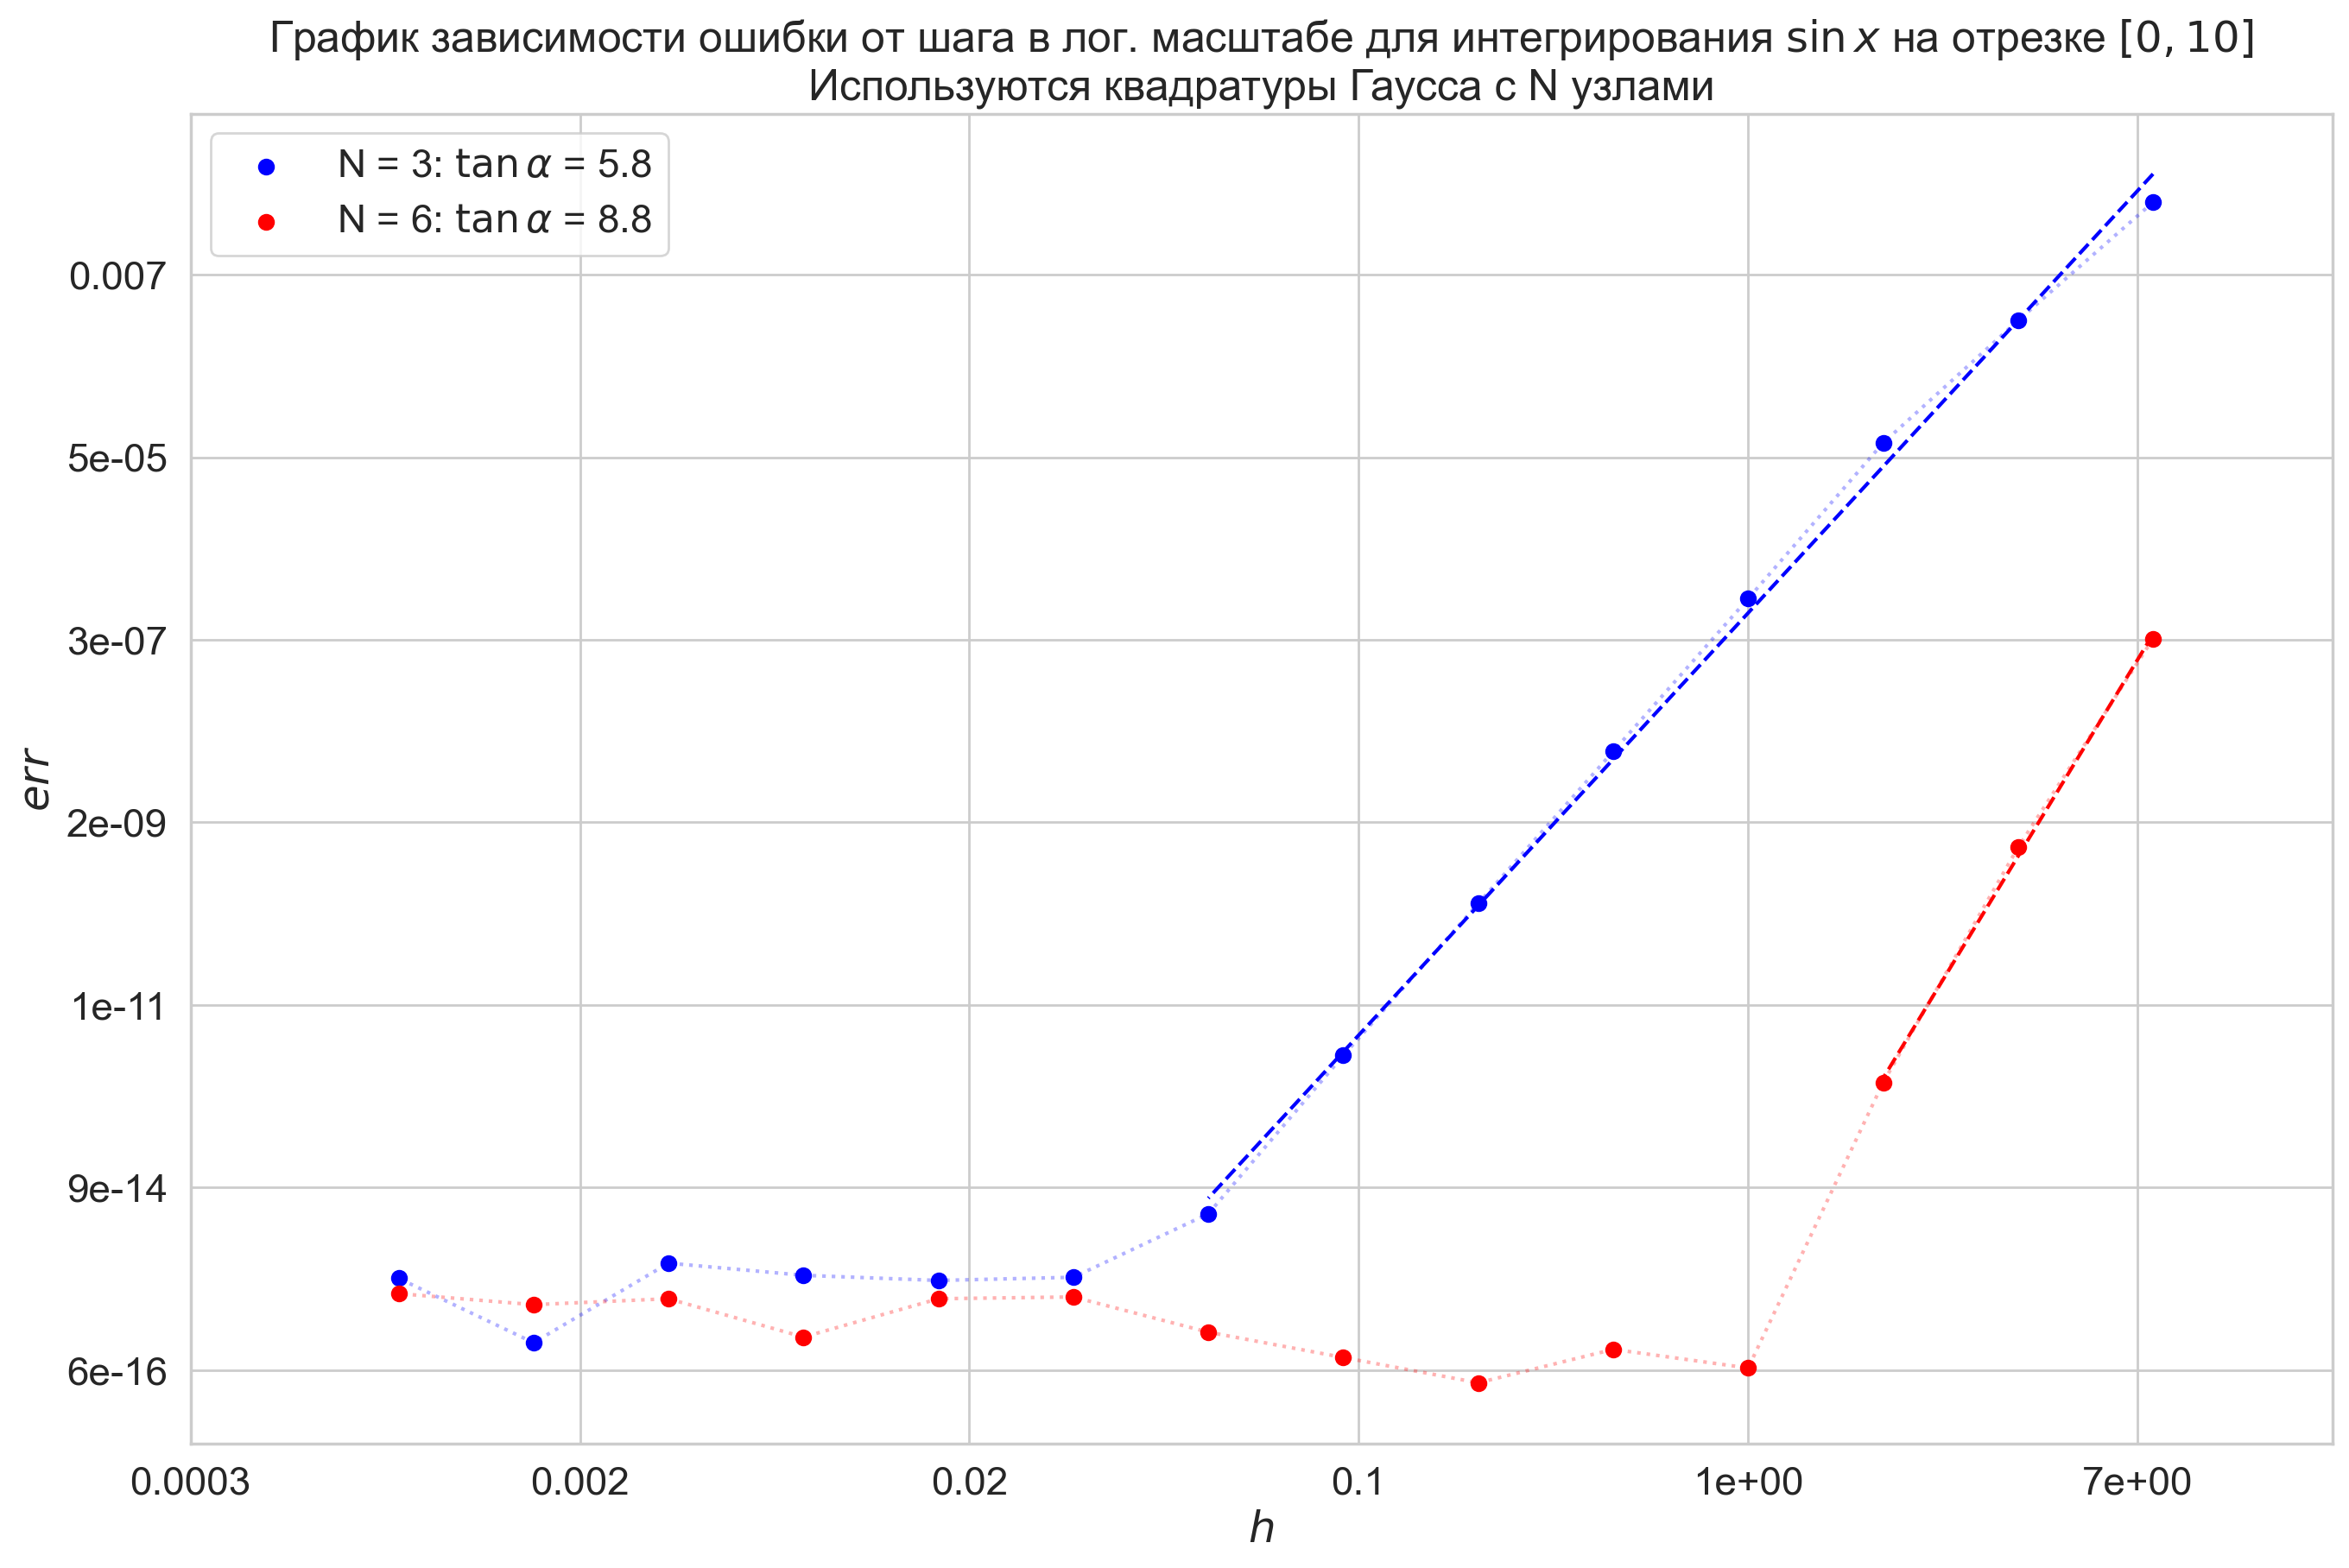

In [13]:
y_data3 = np.log(data.iloc[0, :-1])
y_data6 = np.log(data.iloc[1, :-1])

p3 = np.polyfit(x_data[:8], y_data3[:8], 1)
y_3 = np.polyval(p3, x_data[:8])
k3 = p3[0]

p6 = np.polyfit(x_data[:3], y_data6[:3], 1)
y_6 = np.polyval(p6, x_data[:3])
k6 = p6[0]

fig = plt.figure(figsize= (16,10), dpi= 200)
ax = fig.add_subplot()
plt.xlim(-8, 3)

plt.scatter(x_data, y_data3, c = 'blue', label = f'N = 3: $\\tan \\alpha$ = {k3:.1f}')
plt.plot(x_data, y_data3, c = 'blue', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:8], y_3, c = 'blue', linestyle = '--')

plt.scatter(x_data, y_data6, c = 'red', label = f'N = 6: $\\tan \\alpha$ = {k6:.1f}')
plt.plot(x_data, y_data6, c = 'red', linestyle = ':', alpha = 0.3)
plt.plot(x_data[:3], y_6, c = 'red', linestyle = '--')


ax.yaxis.set_major_formatter(lambda x, pos: f'{np.exp(x):.1}')
ax.xaxis.set_major_formatter(lambda x, pos: f'{np.exp(x):.1}')

plt.title('График зависимости ошибки от шага в лог. масштабе для интегрирования $\sin x$ на отрезке $[0, 10]$\nИспользуются квадратуры Гаусса с N узлами')
plt.legend(loc = 'upper left')
plt.xlabel('$h$')
plt.ylabel('$err$')
plt.savefig(f'plot')